In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [41]:
df = pd.read_csv("Housing.csv")
print(df)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [43]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [44]:
df['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [45]:
enc_cols = df[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']]
for i in enc_cols:
    enc_obj = LabelEncoder()
    df[i] = enc_obj.fit_transform(df[i])

print(df)

        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           0                0           

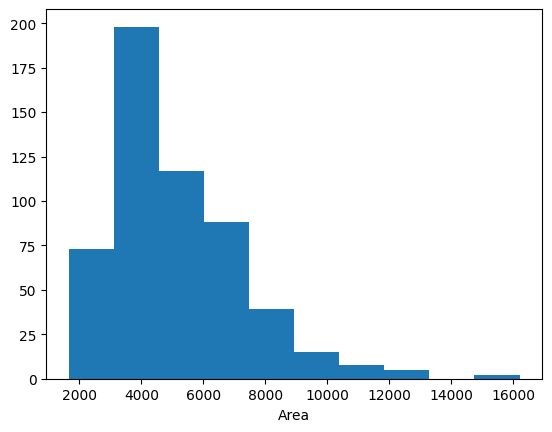

In [46]:
x = df['area']
plt.xlabel('Area')
plt.hist(x)
plt.show()

In [47]:
df['bedrooms'].value_counts()

bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64

In [48]:
df['bathrooms'].value_counts()

bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64

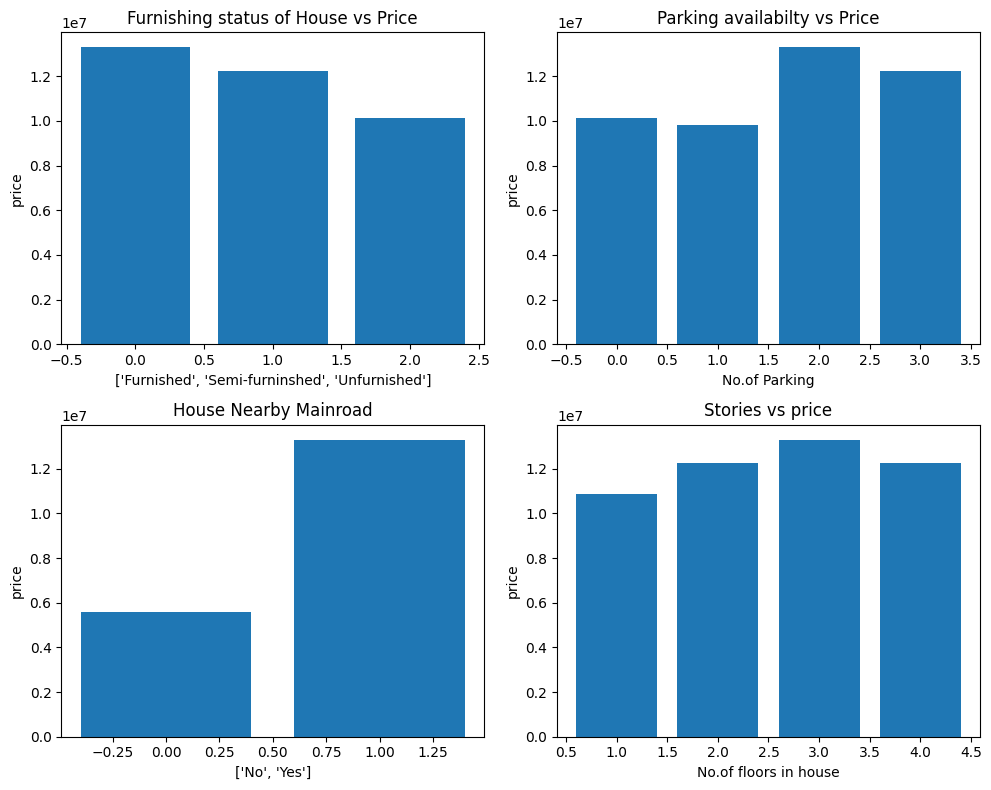

In [54]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

x = df['furnishingstatus']
y = df['price']
col_values = ['Furnished','Semi-furninshed','Unfurnished']
axs[0, 0].set_xlabel(col_values)
axs[0, 0].set_ylabel('price')
axs[0, 0].set_title('Furnishing status of House vs Price')
axs[0, 0].bar(x,y)

x = df['parking']
y = df['price']
axs[0, 1].set_xlabel('No.of Parking')
axs[0, 1].set_ylabel('price')
axs[0, 1].set_title('Parking availabilty vs Price')
axs[0, 1].bar(x,y)

x = df['mainroad']
y = df['price']
col_values = ['No','Yes']
axs[1, 0].set_xlabel(col_values)
axs[1, 0].set_ylabel('price')
axs[1, 0].set_title('House Nearby Mainroad')
axs[1, 0].bar(x,y)

x = df['stories']
y = df['price']
axs[1, 1].set_xlabel('No.of floors in house')
axs[1, 1].set_ylabel('price')
axs[1, 1].set_title('Stories vs price')
axs[1, 1].bar(x,y)


plt.tight_layout()
plt.show()

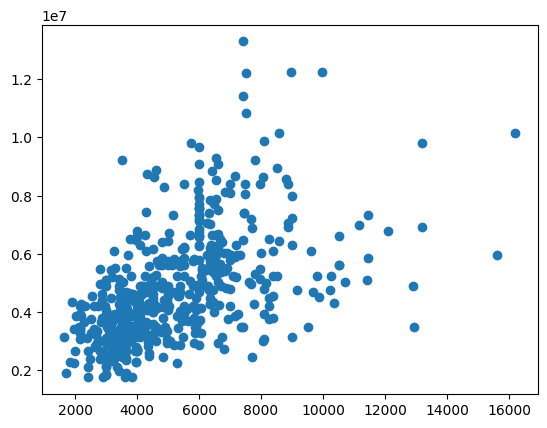

In [39]:
x = df['area']
y = df['price']
plt.scatter(x,y)
plt.show()

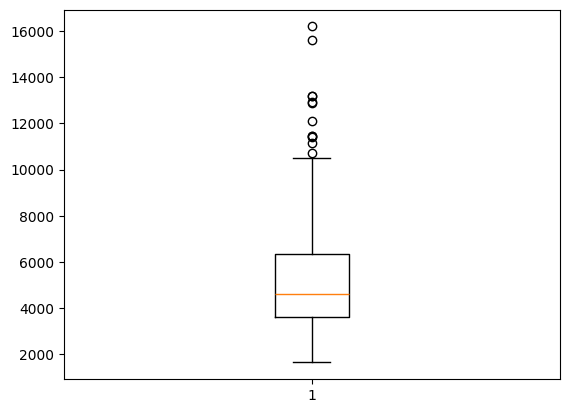

In [13]:
x = df['area']
plt.boxplot(x)
plt.show()

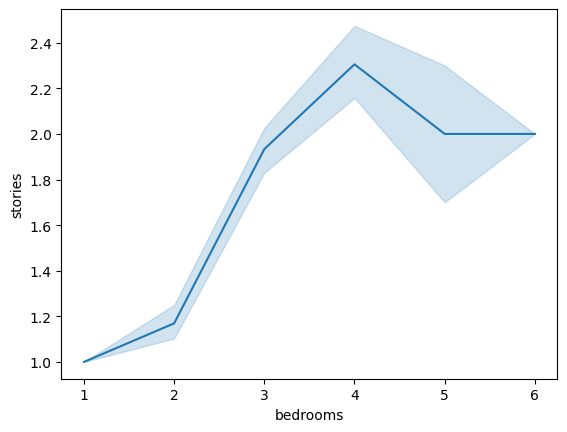

In [14]:
sns.lineplot(x = 'bedrooms',y = 'stories', data = df)
plt.show()

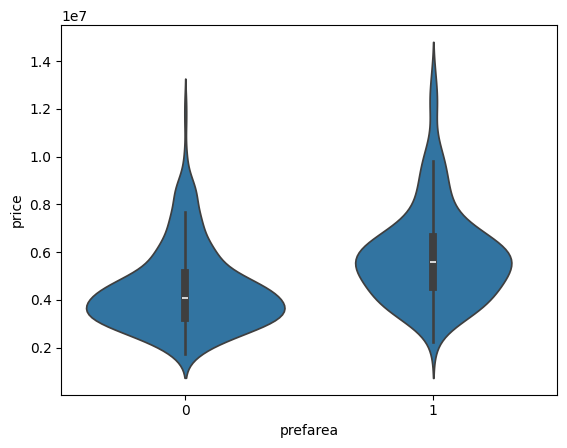

In [15]:
sns.violinplot(x = 'prefarea',y = 'price', data = df)
plt.show()

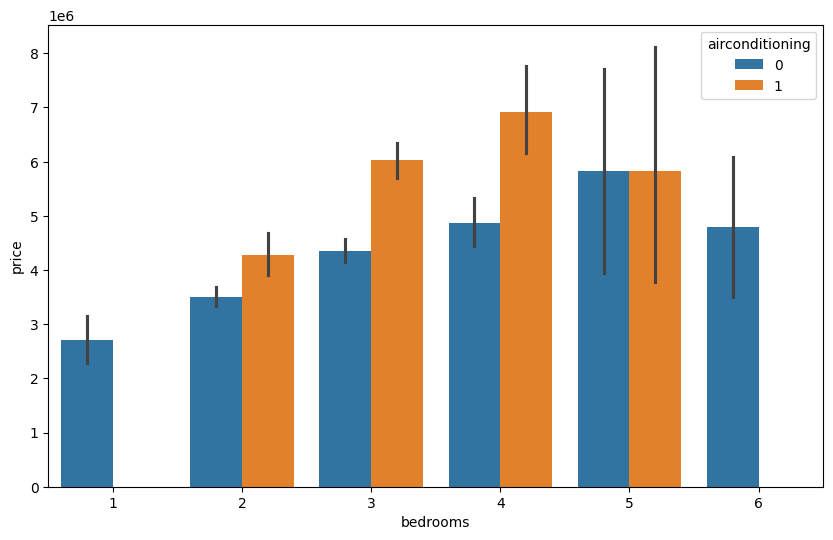

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='bedrooms', y='price',hue = 'airconditioning',data=df, ax=ax)
plt.show()

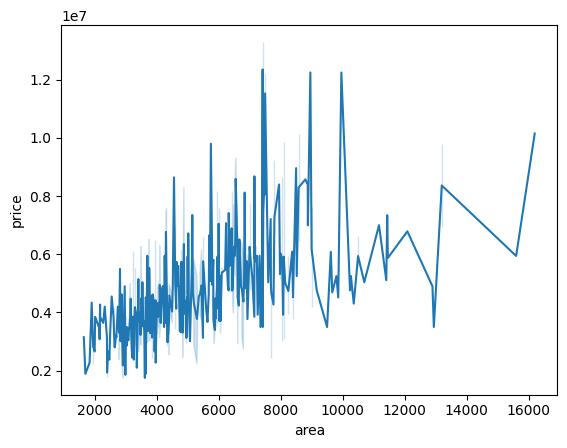

In [17]:
sns.lineplot(x = 'area',y = 'price', data = df)
plt.show()

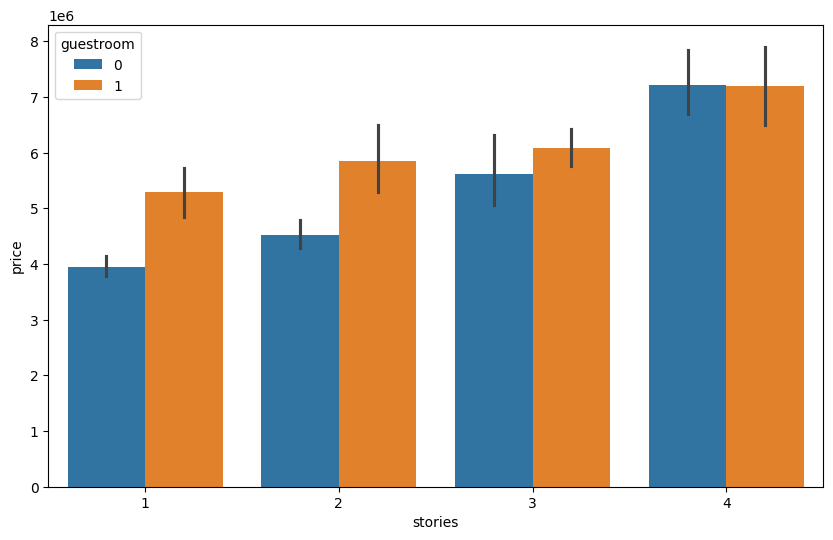

In [55]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='stories', y='price',hue = 'guestroom',data=df, ax=ax)
plt.show()